In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
%matplotlib inline

In [3]:
col=['sepal_length','sepal_width','petal_length','petal_width','class']
path = 'iris.data'
df = pd.read_csv(path, header=None, sep=',')
df.columns=col

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

In [7]:
Total_time=[]
Total_purity=[]
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# KMeans

In [8]:
time_start_KMeans=time.time()
clustering_KMeans = KMeans(n_clusters=3, random_state=5)
clustering_KMeans.fit(df.iloc[:,:4].values)
time_end_KMeans=time.time()
KMeans_label_pred = clustering_KMeans.labels_
time_KMeans=time_end_KMeans-time_start_KMeans

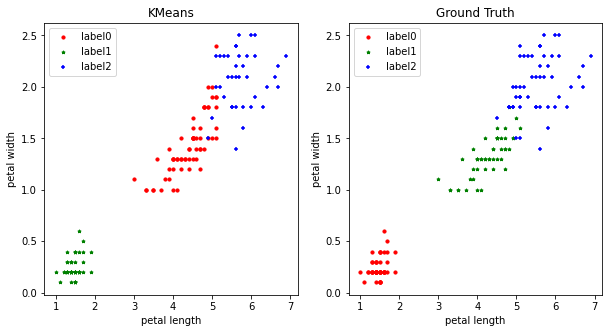

In [9]:
x0 = df[KMeans_label_pred == 0]
x1 = df[KMeans_label_pred == 1]
x2 = df[KMeans_label_pred == 2]
x3 = df[df['class']== 0]
x4 = df[df['class']== 1]
x5 = df[df['class']== 2]
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('KMeans')
ax1.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='label1',s=10)  
ax1.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='label2',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x3['petal_length'], x3['petal_width'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x4['petal_length'], x4['petal_width'], c="green", marker='*', label='label1',s=10)  
ax2.scatter(x5['petal_length'], x5['petal_width'], c="blue", marker='+', label='label2',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

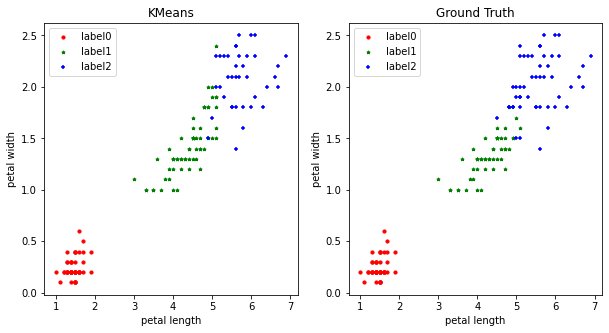

In [10]:
relabel = np.choose(KMeans_label_pred,[1,0,2]).astype(np.int64)
x0 = df[relabel == 0]
x1 = df[relabel == 1]
x2 = df[relabel == 2]
x3 = df[df['class']== 0]
x4 = df[df['class']== 1]
x5 = df[df['class']== 2]
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('KMeans')
ax1.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='label1',s=10)  
ax1.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='label2',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x3['petal_length'], x3['petal_width'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x4['petal_length'], x4['petal_width'], c="green", marker='*', label='label1',s=10)  
ax2.scatter(x5['petal_length'], x5['petal_width'], c="blue", marker='+', label='label2',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]] 
plt.show() 


In [11]:
Total_time.append(time_KMeans)
Total_purity.append(purity_score(df['class'],relabel))
print("KMeans_time:",time_KMeans)
print("Purity:",purity_score(df['class'],relabel))

KMeans_time: 0.03291177749633789
Purity: 0.8933333333333333


In [12]:
print(classification_report(df['class'],relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Agglomerative_hierarchy

In [13]:
time_start_Agg=time.time()
clustering_Agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clustering_Agg.fit(df.iloc[:,:4].values)
#clustering_Agg.fit_predict(df.iloc[:,:4].values)
Agg_label_pred = clustering_Agg.labels_
time_end_Agg=time.time()
time_Agg=time_end_Agg-time_start_Agg

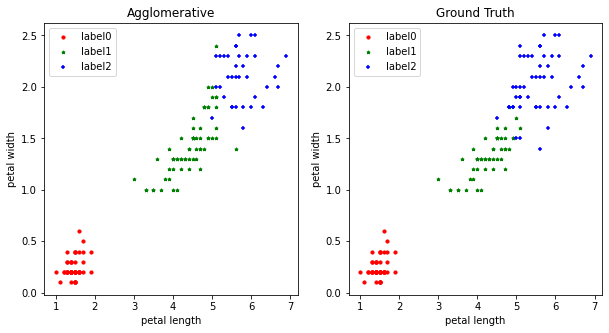

In [14]:
relabe2 = np.choose(Agg_label_pred,[1,0,2]).astype(np.int64)
x0 = df[relabe2 == 0]
x1 = df[relabe2 == 1]
x2 = df[relabe2 == 2]
x3 = df[df['class']== 0]
x4 = df[df['class']== 1]
x5 = df[df['class']== 2]
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('Agglomerative')
ax1.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='label1',s=10)  
ax1.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='label2',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x3['petal_length'], x3['petal_width'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x4['petal_length'], x4['petal_width'], c="green", marker='*', label='label1',s=10)  
ax2.scatter(x5['petal_length'], x5['petal_width'], c="blue", marker='+', label='label2',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]] 
plt.show() 


In [15]:
Total_time.append(time_Agg)
Total_purity.append(purity_score(df['class'],relabe2))
print("Agglomerative_time:",time_Agg)
print("Purity:",purity_score(df['class'],relabe2))

Agglomerative_time: 0.0019686222076416016
Purity: 0.8933333333333333


In [16]:
print(classification_report(df['class'],relabe2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.98      0.86        50
           2       0.97      0.70      0.81        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Scipy_hierarchy

In [17]:
import scipy.cluster.hierarchy as sch

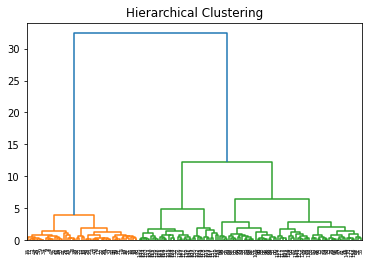

In [18]:
k=3
time_start_hierarchy=time.time()
dis=sch.linkage(df.iloc[:,:4],metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
clustering_Scipy=sch.fcluster(dis,k,criterion='maxclust')
time_end_hierarchy=time.time()
time_Scipy=time_end_hierarchy-time_start_hierarchy
plt.show()

In [19]:
clustering_Scipy=clustering_Scipy-1

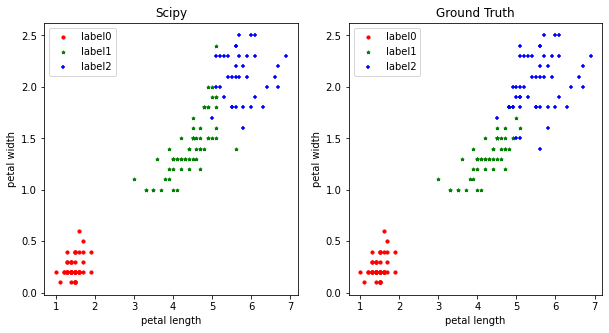

In [20]:
relabe3 = np.choose(Agg_label_pred,[1,0,2]).astype(np.int64)
x0 = df[relabe3 == 0]
x1 = df[relabe3 == 1]
x2 = df[relabe3 == 2]
x3 = df[df['class']== 0]
x4 = df[df['class']== 1]
x5 = df[df['class']== 2]
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('Scipy')
ax1.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='label1',s=10)  
ax1.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='label2',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x3['petal_length'], x3['petal_width'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x4['petal_length'], x4['petal_width'], c="green", marker='*', label='label1',s=10)  
ax2.scatter(x5['petal_length'], x5['petal_width'], c="blue", marker='+', label='label2',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]] 
plt.show() 

In [21]:
Total_time.append(time_Scipy)
Total_purity.append(purity_score(df['class'],relabe3))
print("Scipy_time:",time_Scipy)
print("Purity:",purity_score(df['class'],relabe3))

Scipy_time: 0.307145357131958
Purity: 0.8933333333333333


In [22]:
print(classification_report(df['class'],clustering_Scipy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.03      0.02      0.02        50
           2       0.23      0.30      0.26        50

    accuracy                           0.44       150
   macro avg       0.42      0.44      0.43       150
weighted avg       0.42      0.44      0.43       150



# DBSCAN

min_samples: 5
eps: [0.6324555320336759]
min_samples: 6
eps: [0.6324555320336759]
min_samples: 7
eps: [0.6324555320336759]
min_samples: 8
eps: [0.6324555320336759]
min_samples: 9
eps: [0.6324555320336759]
min_samples: 10
eps: [0.6324555320336759]


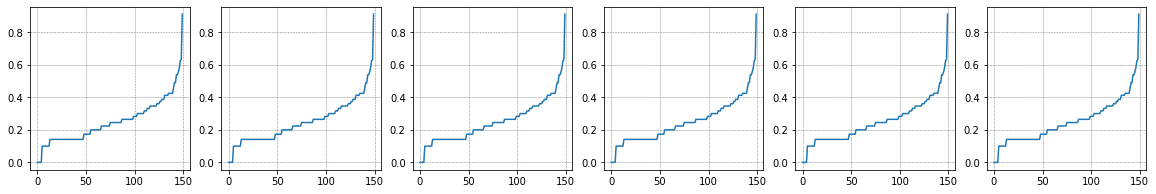

In [23]:
j=1
plt.figure(figsize=(20,3))
for i in range(5,11):
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(df)
    distances, indices = neighbors_fit.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.subplot(1,6,j)
    plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
    plt.plot(distances)
    
    j+=1
    index=[]
    score=[]
    fin_score=[]
    fin_eps=[]
    for k in range(len(distances)):
        if k==0:
            continue
        else:
            if(distances[k]!=distances[k-1]):
                index.append(k)
                score.append(distances[k]-distances[k-1])
                fin_score.append(distances[k-1])

    max_score=max(score)
    for l in range(len(index)):
        if(score[l]==max_score):
            fin_eps.append(fin_score[l])
            print("min_samples:",i)
            print("eps:",fin_eps)

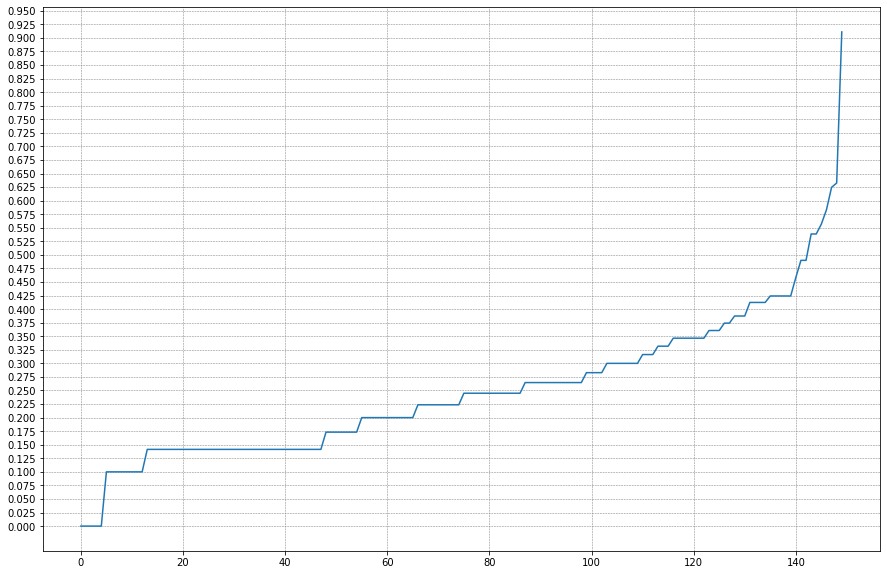

In [24]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.yticks(np.arange(0, 1, step=0.025))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(distances)

In [25]:
time_start_DBSCAN=time.time()
clustering_Dbscan = DBSCAN(eps=0.425, min_samples=5)
clustering_Dbscan.fit(df.iloc[:,:4].values)
Dbscan_label_pred = clustering_Dbscan.labels_
time_end_DBSCAN=time.time()
time_DBSCAN=time_end_DBSCAN-time_start_DBSCAN

In [26]:
Dbscan_label_pred=Dbscan_label_pred+1

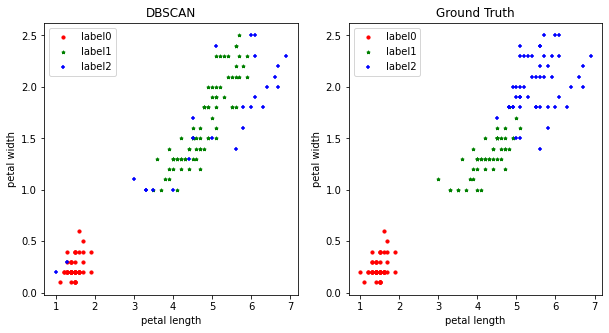

In [27]:
relabe4 = np.choose(Dbscan_label_pred,[2,0,1]).astype(np.int64)
x0 = df[relabe4 == 0]
x1 = df[relabe4 == 1]
x2 = df[relabe4 == 2]
x3 = df[df['class']== 0]
x4 = df[df['class']== 1]
x5 = df[df['class']== 2]
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('DBSCAN')
ax1.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='label1',s=10)  
ax1.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='label2',s=10)

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x3['petal_length'], x3['petal_width'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x4['petal_length'], x4['petal_width'], c="green", marker='*', label='label1',s=10)  
ax2.scatter(x5['petal_length'], x5['petal_width'], c="blue", marker='+', label='label2',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

In [28]:
Total_time.append(time_DBSCAN)
Total_purity.append(purity_score(df['class'],relabe4))
print("DBSCAN_time:",time_DBSCAN)
print("Purity:",purity_score(df['class'],relabe4))

DBSCAN_time: 0.003989696502685547
Purity: 0.72


In [29]:
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.032912,0.001969,0.307145,0.00399
Purity,0.893333,0.893333,0.893333,0.72000
